## Under-Five Mortality Rate

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data

In [54]:
df = pd.read_csv('/Users/aathik/Documents/Uwin/ADT/Project/Notebooks2/PROJECT-ADT/mortality.csv')

#### Data Preprocessing

In [55]:
df.head()

,Country,2000,2006,2012,2021
0,Afghanistan,12.9,10.4,8.0,6.0
1,Albania,2.7,1.9,1.1,1.0
2,Algeria,4,3.2,2.6,2.3
3,Angola,20.4,15.6,10.5,7.5
4,Argentina,2,1.6,1.3,0.9


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  135 non-null    object 
 1   2000     135 non-null    object 
 2   2006     135 non-null    object 
 3   2012     135 non-null    float64
 4   2021     135 non-null    float64
dtypes: float64(2), object(3)
memory usage: 5.4+ KB


In [57]:
df.replace('—', float('nan'), inplace=True)
df.isnull().sum()

Country    0
2000       5
2006       2
2012       0
2021       0
dtype: int64

In [58]:
df.replace("<5", 4, inplace=True)
df.replace("<2.5", 1.5, inplace=True)

In [59]:
df['2000'] = df['2000'].astype(float)
df['2006'] = df['2006'].astype(float)
df['2012'] = df['2012'].astype(float)
df['2021'] = df['2021'].astype(float)
cols_to_fill = ['2000', '2006', '2012', '2021']
df[cols_to_fill] = df[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)

In [60]:
df.isnull().sum()

Country    0
2000       0
2006       0
2012       0
2021       0
dtype: int64

In [61]:
countries_to_filter = [
    "Tunisia", "Algeria", "Morocco", "Cabo Verde", "Mauritius", "Democratic Republic of the Congo",
    "Chad", "Central African Republic", "Burundi", "Comoros", "South Sudan", "Syrian Arab Republic",
    "Somalia", "China", "Kuwait", "Turkey", "Uzbekistan", "Mongolia", "Korea (DPR)", "India",
    "Afghanistan", "Timor-Leste", "Yemen", "Belarus", "Bosnia & Herzegovina", "Croatia",
    "Estonia", "Latvia", "Bulgaria", "Albania", "Russian Federation", "Ukraine", "Moldova (Republic of)",
    "Cuba", "Costa Rica", "Dominican Republic", "Mexico", "Jamaica", "Trinidad & Tobago",
    "Honduras", "Nicaragua", "Guatemala", "Haiti", "Fiji", "Solomon Islands", "Papua New Guinea",
    "Brazil", "Chile", "Uruguay", "Argentina", "Paraguay", "Suriname", "Guyana",
    "Bolivia (Plurinat. State of)", "Ecuador", "Venezuela"
]
filtered_df = df[df['Country'].isin(countries_to_filter)].copy()

numeric_columns = ['2000', '2006', '2012', '2021']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
# Display the updated DataFrame


filtered_df.head()

,Country,2000,2006,2012,2021
0,Afghanistan,12.9,10.4,8.0,6.0
1,Albania,2.7,1.9,1.1,1.0
2,Algeria,4.0,3.2,2.6,2.3
4,Argentina,2.0,1.6,1.3,0.9
9,Belarus,1.3,0.8,0.5,0.3


#### Analysis

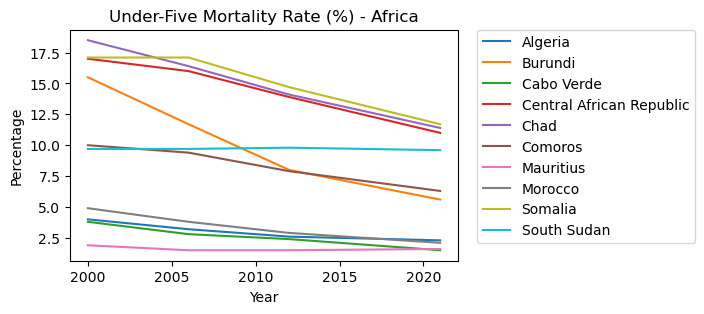

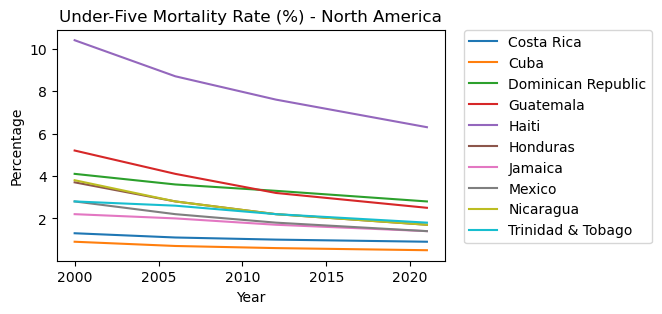

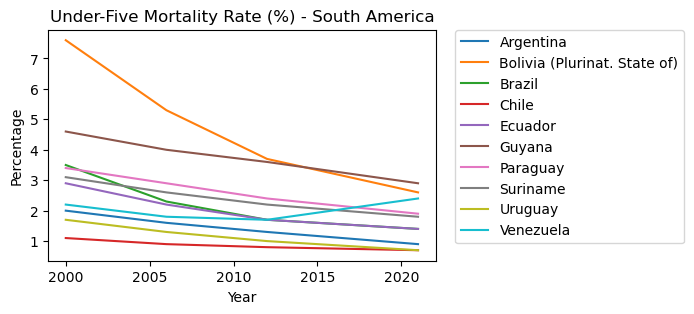

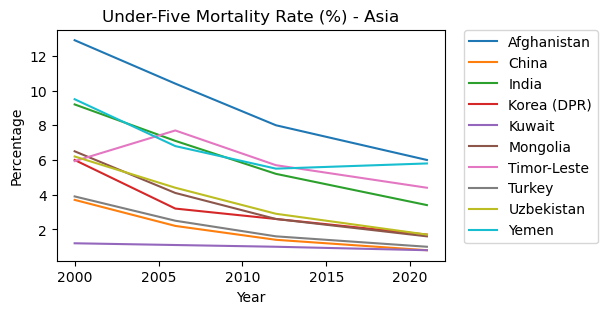

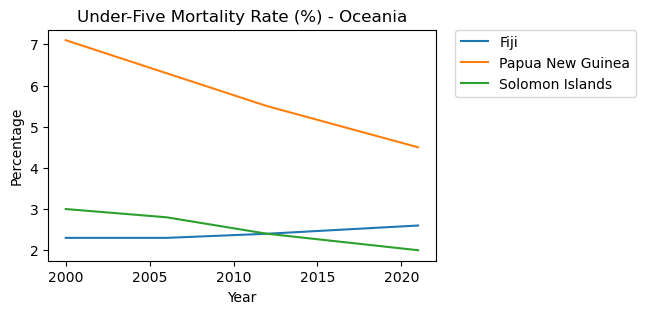

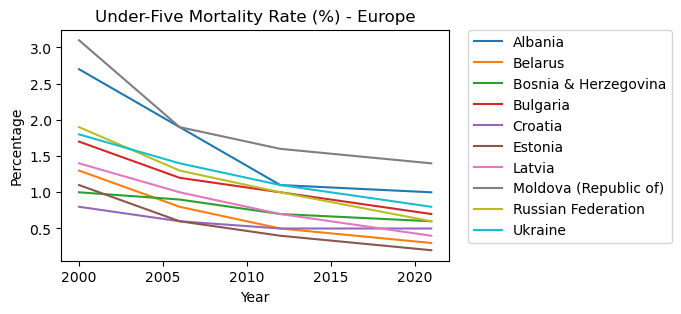

In [62]:
# Filter the data (replace this with your filtered data)
contintent_df = filtered_df.copy()

continent_mapping = {
    'Africa': ['Algeria', 'Morocco', 'Cabo Verde', 'Mauritius', 'Democratic Republic of the Congo',
               'Chad', 'Central African Republic', 'Burundi', 'Comoros', 'South Sudan', 'Somalia'],
    'North America': ['Mexico', 'Jamaica', 'Trinidad & Tobago', 'Honduras', 'Nicaragua', 'Haiti',
                      'Cuba', 'Costa Rica', 'Dominican Republic', 'Guatemala'],
    'South America': ['Brazil', 'Venezuela', 'Suriname', 'Guyana',
                      'Bolivia (Plurinat. State of)', 'Ecuador','Chile','Uruguay','Argentina','Paraguay'],
    'Asia': ['China', 'Kuwait', 'Turkey', 'Uzbekistan', 'Mongolia', 'Korea (DPR)', 'India',
             'Afghanistan', 'Timor-Leste', 'Yemen'],
    'Oceania': ['Fiji', 'Solomon Islands', 'Papua New Guinea'],
    'Europe': ['Belarus', 'Bosnia & Herzegovina', 'Croatia', 'Estonia', 'Latvia', 'Bulgaria',
               'Albania', 'Russian Federation', 'Ukraine', 'Moldova (Republic of)']
}

# Plot the graph for each continent
for continent, countries in continent_mapping.items():
    continent_df = filtered_df[filtered_df['Country'].isin(countries)]

    ghi_df = continent_df[['Country', '2000', '2006', '2012', '2021']].copy()

    # Melt the DataFrame to gather all years into a single column
    ghi_df = ghi_df.melt(id_vars='Country', var_name='Year', value_name='GHI Score')

    # Convert 'Year' column to numeric data type
    ghi_df['Year'] = ghi_df['Year'].astype(int)
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='Year', y='GHI Score', hue='Country', data=ghi_df, palette='tab10')
    plt.title(f'Under-Five Mortality Rate (%) - {continent}')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()


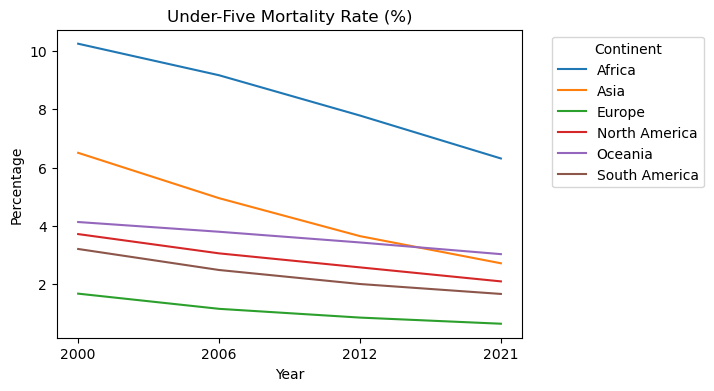

In [63]:
cont_analysis_df = filtered_df.copy()
cont_analysis_df['Continent'] = cont_analysis_df['Country'].map(lambda country: next((continent for continent, countries in continent_mapping.items() if country in countries), 'Unknown'))
cont_analysis_df = cont_analysis_df[cont_analysis_df['Continent'] != 'Unknown']
#print(cont_analysis_df)

years = ['2000', '2006', '2012', '2021']
cont_analysis_df[years] = cont_analysis_df[years].apply(pd.to_numeric)

# Group the DataFrame by 'Continent' and calculate the mean values for each year
continent_mean_df = cont_analysis_df.groupby('Continent')[years].mean()

# Transpose the DataFrame to get years as columns and continents as rows
continent_mean_df = continent_mean_df.T

# Plot the line chart
plt.figure(figsize=(6, 4))
for continent in continent_mean_df.columns:
    plt.plot(years, continent_mean_df[continent], label=continent)
    

plt.title('Under-Five Mortality Rate (%)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()